## Project Title:            Algerian Forest Project
### Technology:              Machine Learning Technology
### Domain:                  Agriculture
### Project Difficulty Level: Intermediate

> Problem Statement:

The Goal is to predict the temperature of the forest. This is basically a Regression problem where the forest has recorded from June 2012 to September 2012.

> Dataset to downloaded from the below link:

https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

In [16]:
# Importing Libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None) # to disply all columns

In [17]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is BE09-1442

 Directory of d:\Data Scientist\1_iNeuron\02 Full Stack Data Science ineuron\03 Machine Learning\Algerian Forest\EDA-on-Algerian-Forest-Fires-Dataset

19-05-2023  15:47    <DIR>          .
19-05-2023  15:47    <DIR>          ..
19-05-2023  12:08            14,759 Algerian_forest_fires_dataset_UPDATE.csv
19-05-2023  14:40           137,819 Cleaning_Split.ipynb
19-05-2023  15:43           753,325 Data Preparation_test.ipynb
19-05-2023  15:43           753,325 Data Preparation_train.ipynb
19-05-2023  12:08            35,823 LICENSE
19-05-2023  15:44            16,596 prepared_data_train.csv
19-05-2023  12:08               125 README.md
19-05-2023  14:34             5,034 test.csv
19-05-2023  14:34            10,054 train.csv
               9 File(s)      1,726,860 bytes
               2 Dir(s)  454,104,784,896 bytes free


In [18]:
dataset = pd.read_csv("test.csv")
# Finding the shape of dataset
print(f"There are {dataset.shape[0]} rows and {dataset.shape[1]} columns in the dataset\n")
dataset.head()

There are 81 rows and 15 columns in the dataset



,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,19,9,2012,29,57,14,0.0,89.3,12.5,41.3,7.8,14.2,9.7,fire,0.0
1,29,6,2012,37,36,13,0.6,86.2,17.9,36.7,4.8,17.8,7.2,fire,1.0
2,8,7,2012,33,68,19,0.0,85.6,12.5,49.8,6.0,15.4,8.0,fire,0.0
3,15,8,2012,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,fire,0.0
4,18,9,2012,32,49,11,0.0,89.4,9.8,33.1,6.8,11.3,7.7,fire,0.0


In [19]:
# Finding the information about the dataset:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          81 non-null     int64  
 1   month        81 non-null     int64  
 2   year         81 non-null     int64  
 3   Temperature  81 non-null     int64  
 4   RH           81 non-null     int64  
 5   Ws           81 non-null     int64  
 6   Rain         81 non-null     float64
 7   FFMC         81 non-null     float64
 8   DMC          81 non-null     float64
 9   DC           81 non-null     float64
 10  ISI          81 non-null     float64
 11  BUI          81 non-null     float64
 12  FWI          81 non-null     float64
 13  Classes      81 non-null     object 
 14  Region       81 non-null     float64
dtypes: float64(8), int64(6), object(1)
memory usage: 9.6+ KB


In [20]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
day,81.0,14.691358,8.610520,1.0,7.0,15.0,23.0,31.0
month,81.0,7.604938,1.147595,6.0,7.0,8.0,9.0,9.0
year,81.0,2012.000000,0.000000,2012.0,2012.0,2012.0,2012.0,2012.0
Temperature,81.0,31.987654,3.415018,24.0,30.0,33.0,35.0,39.0
RH,81.0,63.197531,14.153109,33.0,53.0,64.0,73.0,89.0
Ws,81.0,15.580247,2.649831,6.0,14.0,15.0,17.0,22.0
Rain,81.0,0.760494,1.591201,0.0,0.0,0.0,0.6,7.2
FFMC,81.0,76.654321,15.125459,36.1,70.5,82.4,87.7,93.7
DMC,81.0,13.841975,12.053525,0.9,5.7,9.8,19.0,54.2
DC,81.0,47.177778,47.651676,7.3,10.0,28.1,71.0,220.4


In [21]:
unique_feature=[feature for feature in dataset.columns if len(dataset[feature].unique())==len(dataset)]
print("Unique feature Count {} out of {} features".format(len(unique_feature),len(dataset.columns)))
print(unique_feature)
# seperating the Numerical and Categorical Variables:
numerical_features = [fea for fea in dataset.columns if dataset[fea].dtype != 'O']
print("\n Numerical feature Count {}".format(len(numerical_features)))
print(numerical_features)
unique_feature=[feature for feature in numerical_features if len(dataset[feature].unique())==len(dataset)]
print("\n Unique feature Count {} out of {} features".format(len(unique_feature),len(numerical_features)))
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in unique_feature]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+unique_feature]
print("\n Continuous feature Count {} out of {} features".format(len(continuous_feature),len(numerical_features)))
print(continuous_feature)
print("\n Discrete Variables Count: {} out of {} features".format(len(discrete_feature),len(numerical_features)))
print(discrete_feature)
data = dataset.copy()
pd.DataFrame(list(zip(discrete_feature,[len(data[feature].unique()) for feature in discrete_feature], [data[str(feature)].unique() for feature in discrete_feature])), columns=['Discrete Features','No of Unique Values', 'Unique Values'])



Unique feature Count 0 out of 15 features
[]

 Numerical feature Count 14
['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']

 Unique feature Count 0 out of 14 features

 Continuous feature Count 8 out of 14 features
['day', 'RH', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

 Discrete Variables Count: 6 out of 14 features
['month', 'year', 'Temperature', 'Ws', 'Rain', 'Region']


,Discrete Features,No of Unique Values,Unique Values
0,month,4,"[9, 6, 7, 8]"
1,year,1,[2012]
2,Temperature,15,"[29, 37, 33, 36, 32, 35, 34, 30, 27, 31, 25, 2..."
3,Ws,12,"[14, 13, 19, 11, 12, 15, 17, 16, 18, 21, 6, 22]"
4,Rain,21,"[0.0, 0.6, 0.3, 0.7, 0.1, 2.9, 3.1, 0.2, 0.8, ..."
5,Region,2,"[0.0, 1.0]"


In [22]:
categorical_features = [fea for fea in dataset.columns if dataset[fea].dtype == 'O']
print("Categorical feature Count {}".format(len(categorical_features)))
print(categorical_features)
data = dataset.copy()
pd.DataFrame(list(zip(categorical_features,[len(data[feature].unique()) for feature in categorical_features], [data[str(feature)].unique() for feature in categorical_features])), columns=['Categorical Features','No. of Categories', 'Categories'])

Categorical feature Count 1
['Classes']


,Categorical Features,No. of Categories,Categories
0,Classes,2,"[fire, notfire]"


In [23]:
[data[str(feature)].unique() for feature in categorical_features]


[array(['fire', 'notfire'], dtype=object)]

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,81.0,14.691358,8.610520,1.0,7.0,15.0,23.0,31.0
month,81.0,7.604938,1.147595,6.0,7.0,8.0,9.0,9.0
year,81.0,2012.000000,0.000000,2012.0,2012.0,2012.0,2012.0,2012.0
Temperature,81.0,31.987654,3.415018,24.0,30.0,33.0,35.0,39.0
RH,81.0,63.197531,14.153109,33.0,53.0,64.0,73.0,89.0
Ws,81.0,15.580247,2.649831,6.0,14.0,15.0,17.0,22.0
Rain,81.0,0.760494,1.591201,0.0,0.0,0.0,0.6,7.2
FFMC,81.0,76.654321,15.125459,36.1,70.5,82.4,87.7,93.7
DMC,81.0,13.841975,12.053525,0.9,5.7,9.8,19.0,54.2
DC,81.0,47.177778,47.651676,7.3,10.0,28.1,71.0,220.4


### 1.6 Info about dataset and its attributes

1. The dataset includes 243 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
2. 122 instances for Bejaia region and 121 for Sidi Bel-abbes region.
3. The period from June 2012 to September 2012.
4. The dataset includes 11 attribues and 1 output attribue (class)
5. The 243 instances have been classified into fire (137 classes) and notfire (106 classes) classes.

### Attributes

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather data observations**

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

**FWI Components**

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

# Checking the correlation between features and Target feature

In [25]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [26]:
data.corr()['Temperature'].sort_values(ascending=True)

RH            -0.676245
Rain          -0.245537
Ws            -0.141476
month         -0.058672
day            0.152053
Region         0.280075
DC             0.417466
BUI            0.487695
DMC            0.505503
FWI            0.548257
ISI            0.588888
FFMC           0.671238
Temperature    1.000000
year                NaN
Name: Temperature, dtype: float64

In [27]:
correlated_features = ['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']
pd.DataFrame(list(zip(correlated_features,[len(data[feature].unique()) for feature in correlated_features], [data[str(feature)].unique() for feature in correlated_features])), columns=['Correlated Features','No. of Categories', 'Categories'])


,Correlated Features,No. of Categories,Categories
0,RH,46,"[57, 36, 68, 55, 49, 63, 71, 56, 64, 73, 42, 4..."
1,Ws,12,"[14, 13, 19, 11, 12, 15, 17, 16, 18, 21, 6, 22]"
2,Rain,21,"[0.0, 0.6, 0.3, 0.7, 0.1, 2.9, 3.1, 0.2, 0.8, ..."
3,FFMC,74,"[89.3, 86.2, 85.6, 82.4, 89.4, 88.9, 57.1, 87...."
4,DMC,67,"[12.5, 17.9, 15.6, 9.8, 21.7, 2.5, 19.0, 9.7, ..."
5,DC,72,"[41.3, 36.7, 49.8, 92.5, 33.1, 77.0, 8.2, 85.1..."
6,ISI,62,"[7.8, 4.8, 6.0, 3.7, 6.8, 7.1, 0.6, 5.9, 4.7, ..."
7,BUI,72,"[14.2, 17.8, 15.4, 22.0, 11.3, 25.5, 2.8, 24.4..."
8,FWI,55,"[9.7, 7.2, 8.0, 6.3, 7.7, 12.1, 0.2, 10.2, 5.2..."
9,Classes,2,"[fire, notfire]"


In [28]:
data[correlated_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RH       81 non-null     int64  
 1   Ws       81 non-null     int64  
 2   Rain     81 non-null     float64
 3   FFMC     81 non-null     float64
 4   DMC      81 non-null     float64
 5   DC       81 non-null     float64
 6   ISI      81 non-null     float64
 7   BUI      81 non-null     float64
 8   FWI      81 non-null     float64
 9   Classes  81 non-null     object 
dtypes: float64(7), int64(2), object(1)
memory usage: 6.5+ KB


# Checking For Outliers in the dataset:
## Identifying outliers with visualization
1. Using Scatterplot
2. Using BoxPlot
3. Using Histogram

## 1. Visualizing Scatterplot of features which are correlated with Target Feature

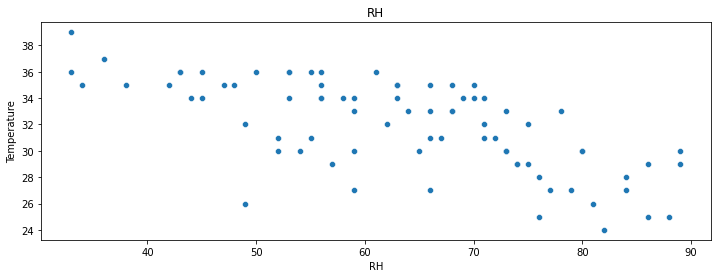

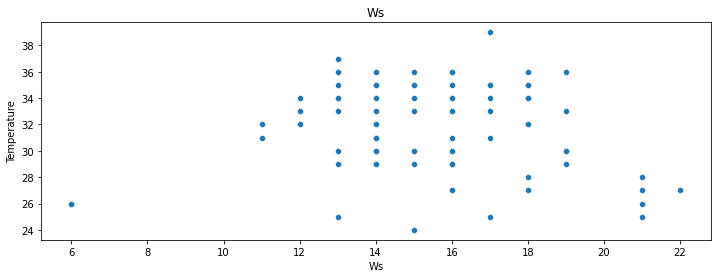

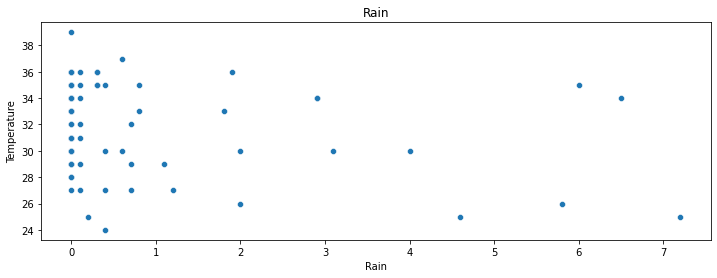

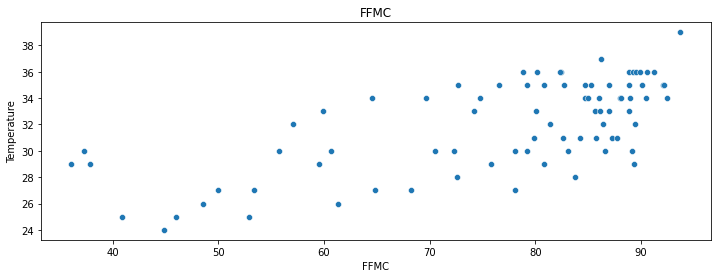

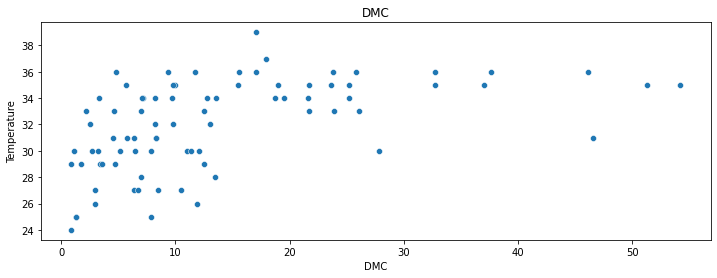

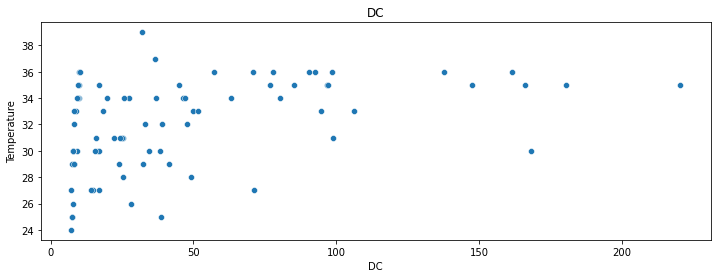

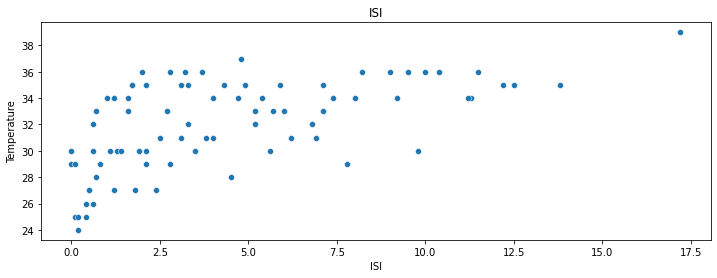

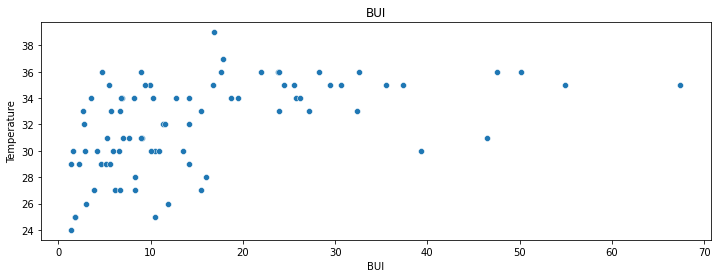

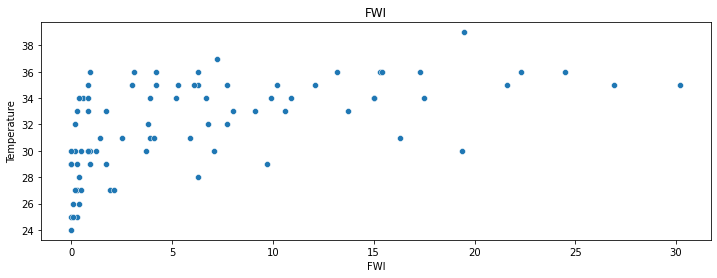

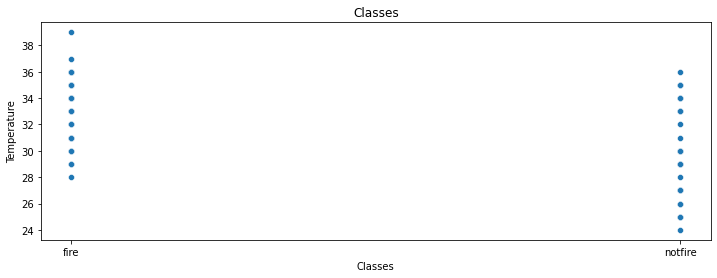

In [29]:
for col in correlated_features:
    plt.figure(figsize=(12,4))
    sns.scatterplot(x=data[col], y = data['Temperature'])
    plt.title(col)

## 2. Visualizing Boxplot of features which are correlated with Target Feature

TypeError: Horizontal orientation requires numeric `x` variable.

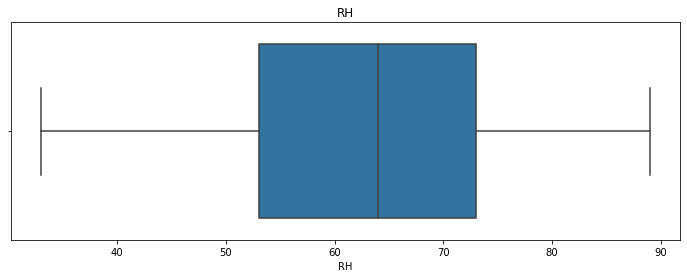

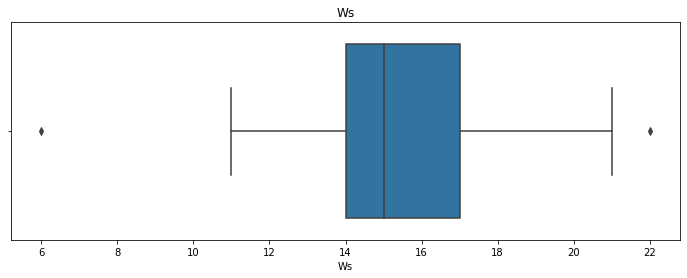

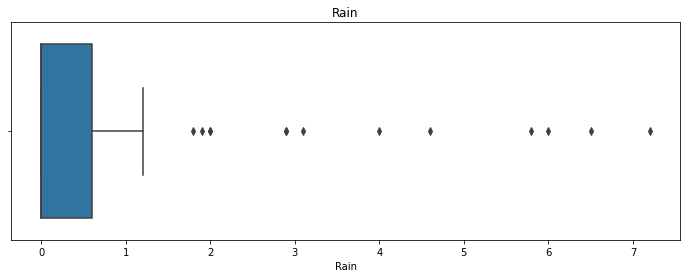

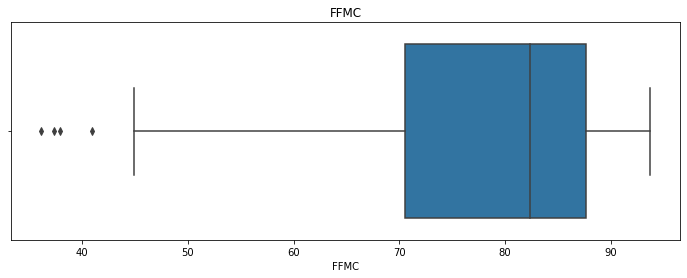

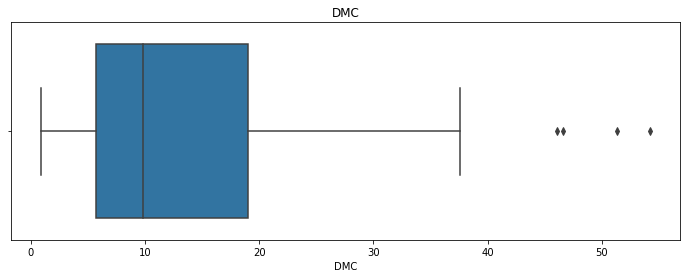

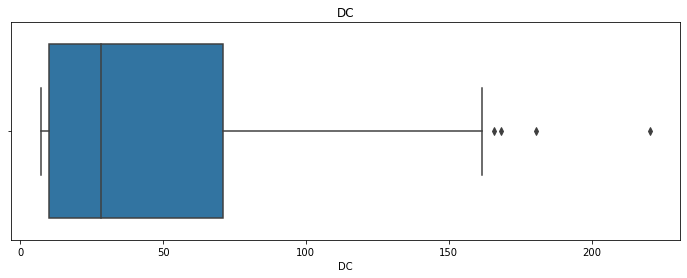

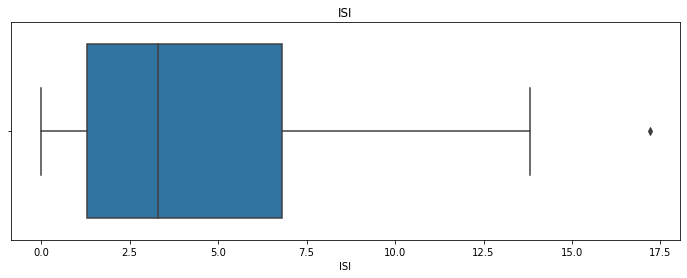

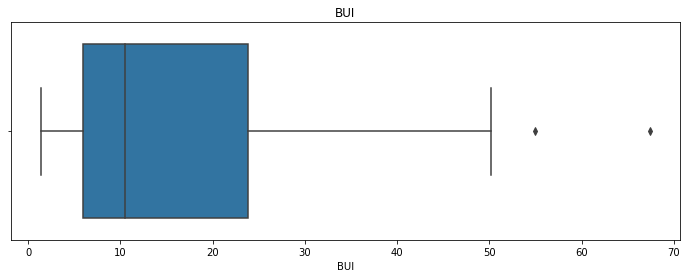

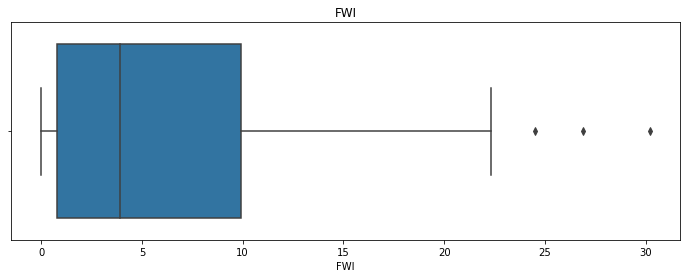

<Figure size 864x288 with 0 Axes>

In [31]:
### excluding 'day', 'month','year', 'Region'.

for col in correlated_features:
    plt.figure(figsize=(12,4))
    sns.boxplot(data = data, x=col)
    plt.title(col)

## 3. Visualizing Histogramplot of features which are correlated with Target Feature

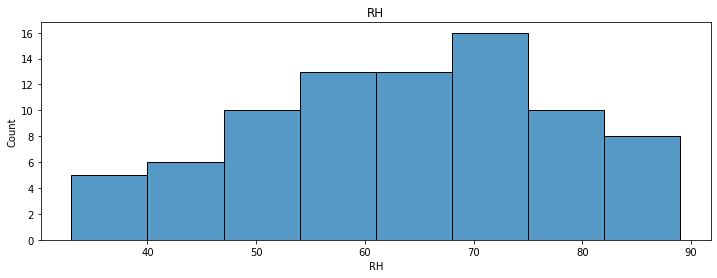

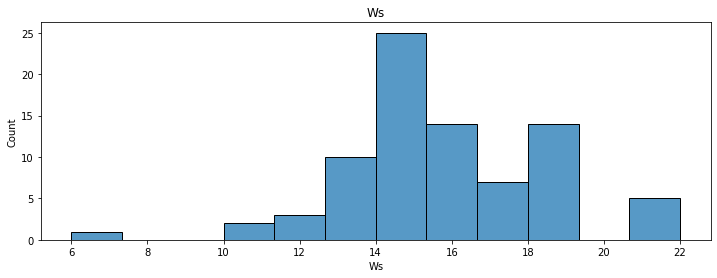

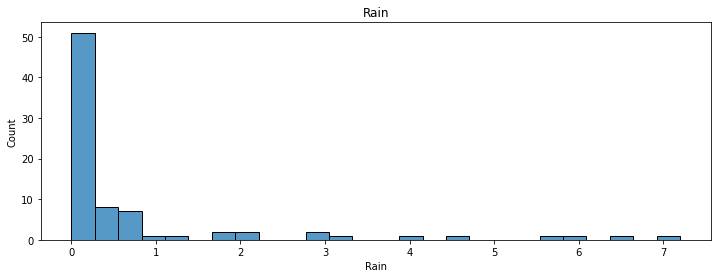

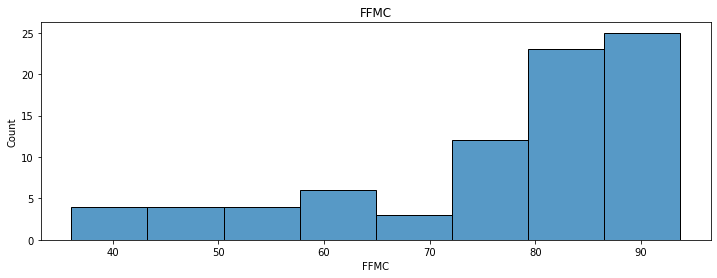

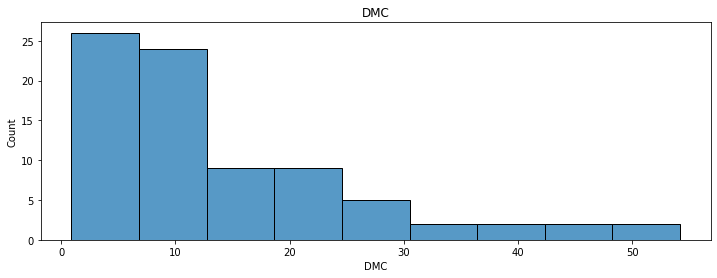

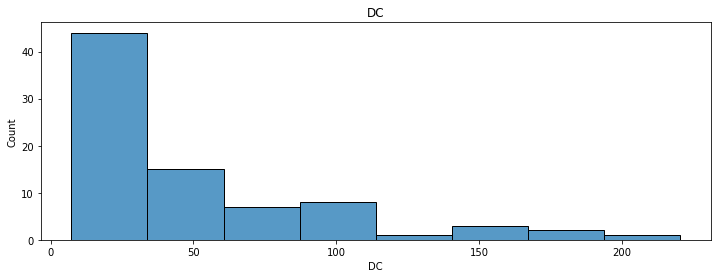

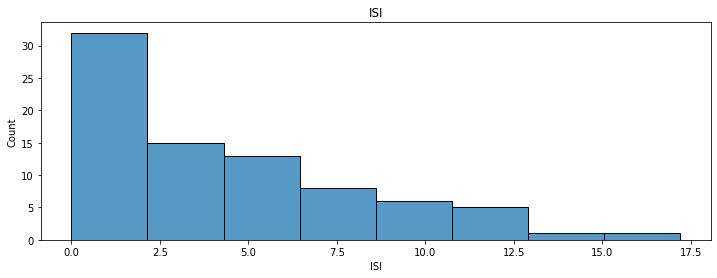

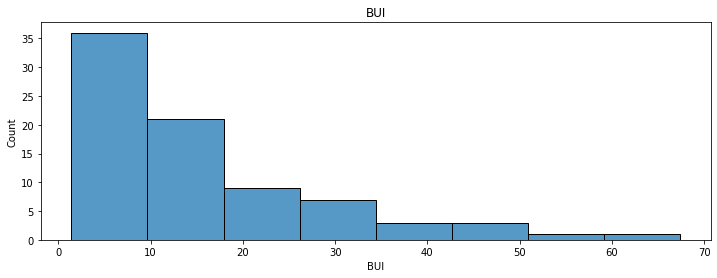

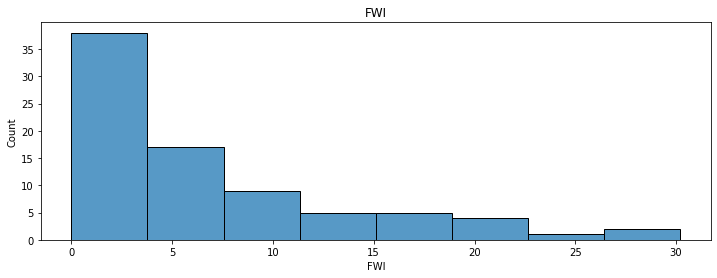

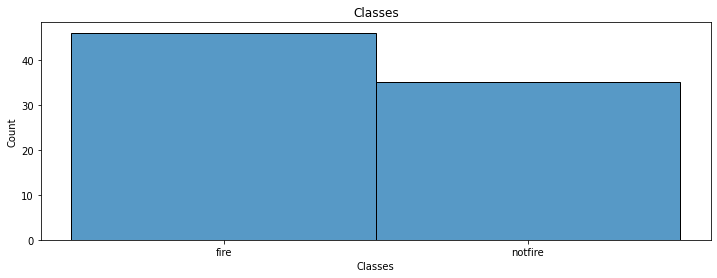

In [32]:
for col in correlated_features:
    plt.figure(figsize=(12,4))
    sns.histplot(data[col])
    plt.title(col)

# Handling Outliers in Dataset:

* [Handling outliers on the IQR if distribution is assumed tobe gaussian](#handling-outliers-in-dataset)
* [Handling outliers on the Extreme Outliers if distribution is NOT assumed tobe gaussian](#function-handling-outliers-on-the-extreme-outliers-if-distribution-is-not-assumed-tobe-gaussian)
* [Compairing features with and without outliers](#function-to-compair-distribution-with-or-without-outlier)
* [Compare Skewness](#compairing-skewness-of-features-with-outliers-and-features-without-outliers)



## Function handling outliers on the IQR if distribution is assumed tobe gaussian


In [33]:
def handle_outliers_IQR(df1, col):
    '''
    This Function handles outliers on the basis of the IQR
    '''
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    #finding upper and lower limit
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    # identify outliers
    outliers = [x for x in df1[col] if x < lower_limit or x > upper_limit]
    print('Identified outliers: %d' % len(outliers))
    # non-outliers
    outliers_removed = [x for x in df1[col] if x >= lower_limit and x <= upper_limit]
    print('Non-outlier observations: %d' % len(outliers_removed))
    #
    df1[col+'iqrO'] = numpy.where(df1[col]>upper_limit, upper_limit, numpy.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col+"iqrO"] > upper_limit]

## Function handling outliers on the Extreme Outliers if distribution is NOT assumed tobe gaussian

In [34]:
def handle_extreme_outliers(df1, col):
    '''
    This Function handles outliers on the basis of the extreme outliers.
    '''
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    #finding upper and lower limit
    upper_limit = percentile75 + 3 * iqr
    lower_limit = percentile25 - 3 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    # identify outliers
    outliers = [x for x in df1[col] if x < lower_limit or x > upper_limit]
    print('Identified outliers: %d' % len(outliers))
    # non-outliers
    outliers_removed = [x for x in df1[col] if x >= lower_limit and x <= upper_limit]
    print('Non-outlier observations: %d' % len(outliers_removed))
    df1[col+"extO"] = numpy.where(df1[col]>upper_limit, upper_limit, numpy.where(df1[col]<lower_limit,lower_limit, df1[col]))
    return df1[df1[col+"extO"] > upper_limit]

## Function to Compair Distribution with or without Outlier:

In [35]:
# Compairing Features with or without Outliers
def create_comparison_plot(df,col1,col2):
    '''
    This function compairs the distribution of the features with or without outliers.
    '''
    plt.figure(figsize=(16,10))
    plt.subplot(2,2,1)
    sns.histplot(df[col1], bins=50, kde=True,color='g')
    plt.title("Feature with Outliers",loc='center')

    plt.subplot(2,2,2)
    sns.boxplot(df[col1])

    plt.subplot(2,2,3)
    plt.title("Feature without Outliers",loc='center')
    sns.histplot(df[col2], bins=50, kde=True)

    plt.subplot(2,2,4)
    sns.boxplot(df[col2])

    plt.show()

In [36]:
correlated_features

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [37]:
handle_extreme_outliers(data,'Ws')

percentile25 14.0
percentile75 17.0
Upper limit 26.0
Lower limit 5.0
Identified outliers: 0
Non-outlier observations: 81


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WsextO


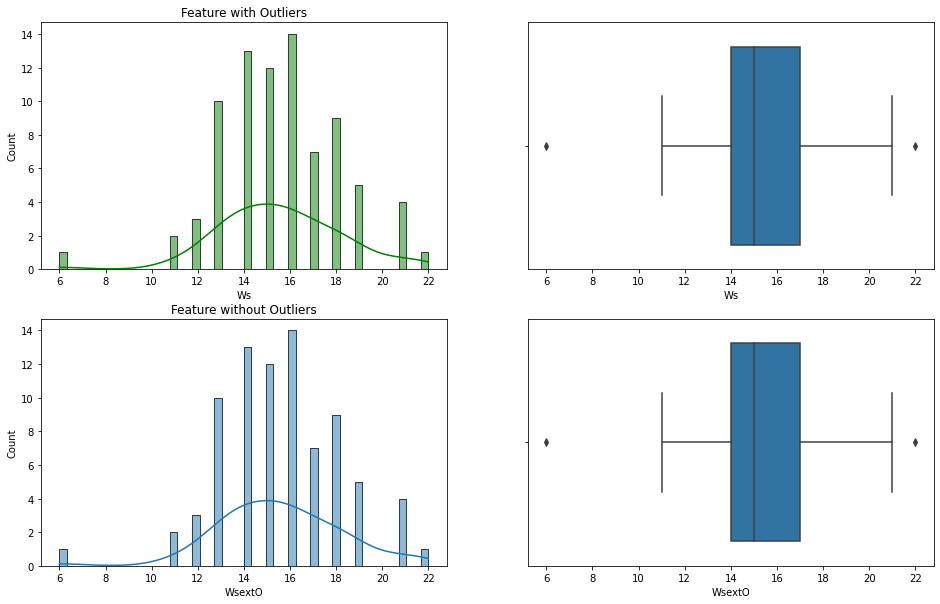

In [38]:
create_comparison_plot(data,col1="Ws", col2="WsextO")

In [39]:
data.drop('WsextO',axis=1,inplace=True)

In [40]:
handle_outliers_IQR(data,'Ws')

percentile25 14.0
percentile75 17.0
Upper limit 21.5
Lower limit 9.5
Identified outliers: 2
Non-outlier observations: 79


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WsiqrO


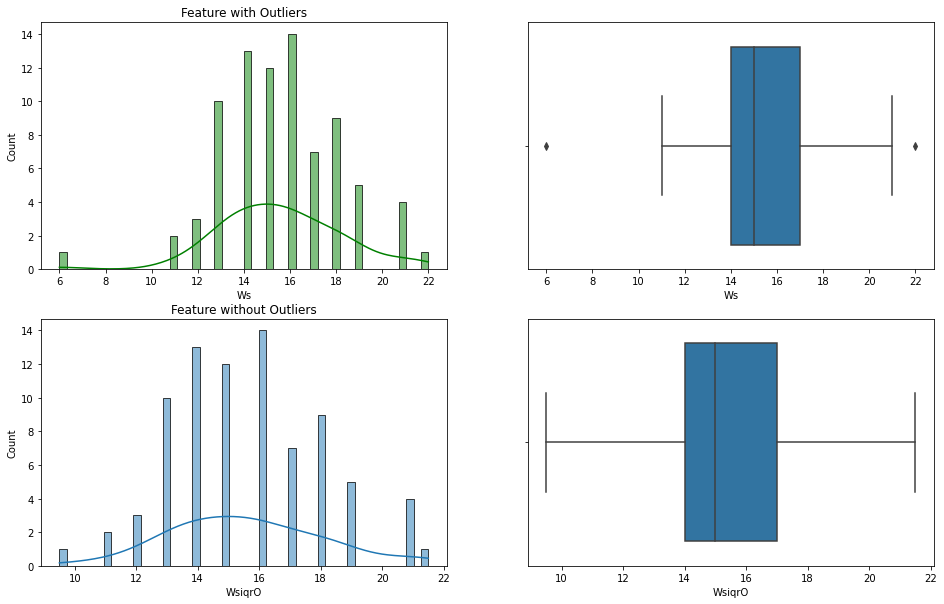

In [41]:
create_comparison_plot(data,col1="Ws", col2="WsiqrO")

In [42]:
correlated_features

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [43]:
handle_extreme_outliers(data,'Rain')

percentile25 0.0
percentile75 0.6
Upper limit 2.4
Lower limit -1.7999999999999998
Identified outliers: 9
Non-outlier observations: 72


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WsiqrO,RainextO


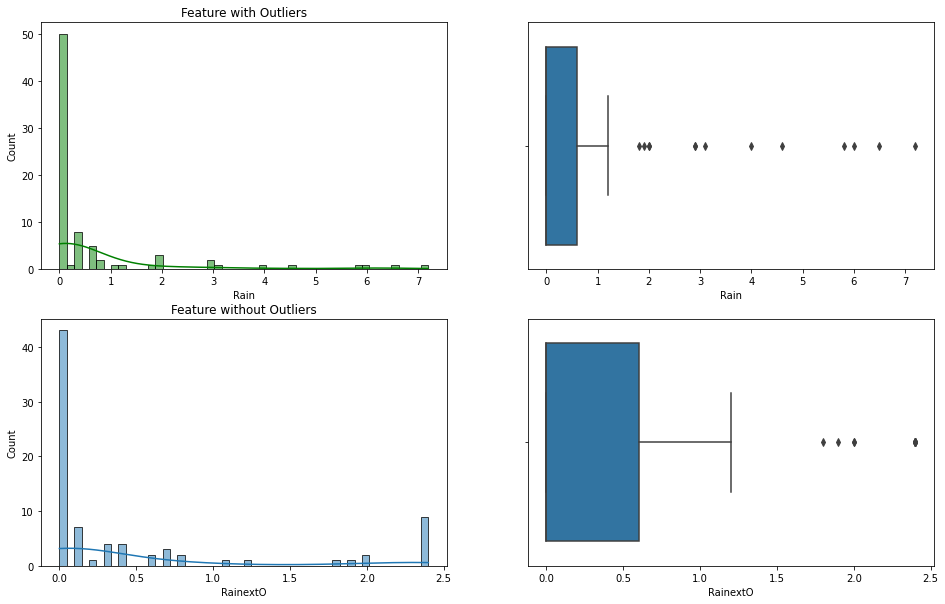

In [44]:
create_comparison_plot(data,col1="Rain", col2="RainextO")

In [45]:
handle_outliers_IQR(data,'Rain')

percentile25 0.0
percentile75 0.6
Upper limit 1.5
Lower limit -0.8999999999999999
Identified outliers: 13
Non-outlier observations: 68


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WsiqrO,RainextO,RainiqrO


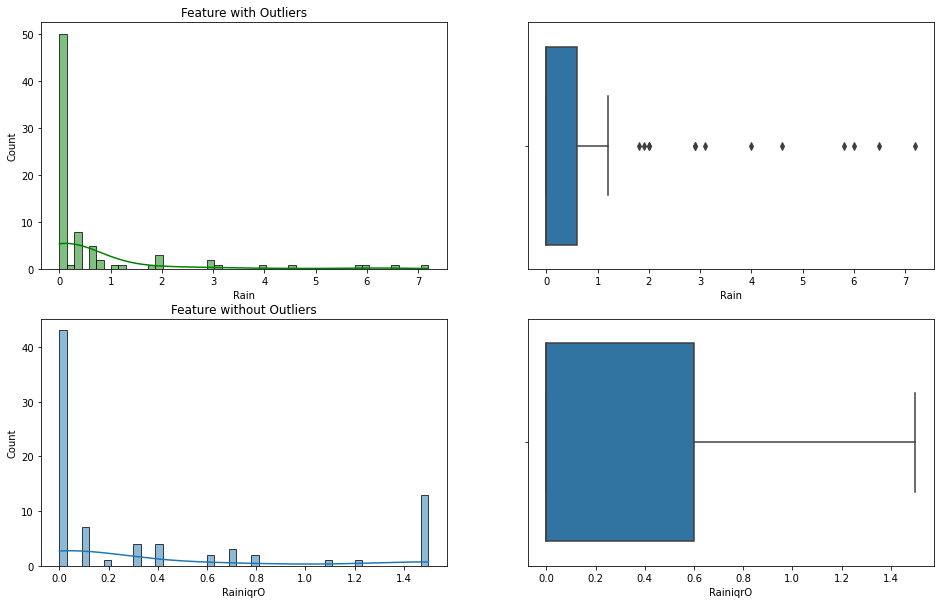

In [46]:
create_comparison_plot(data,col1="Rain", col2="RainiqrO")

In [47]:
correlated_features

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [48]:
handle_extreme_outliers(data,'FFMC')

percentile25 70.5
percentile75 87.7
Upper limit 139.3
Lower limit 18.89999999999999
Identified outliers: 0
Non-outlier observations: 81


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WsiqrO,RainextO,RainiqrO,FFMCextO


In [49]:
data.drop('FFMCextO',axis =1, inplace = True)

In [50]:
handle_outliers_IQR(data,'FFMC')

percentile25 70.5
percentile75 87.7
Upper limit 113.5
Lower limit 44.699999999999996
Identified outliers: 4
Non-outlier observations: 77


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WsiqrO,RainextO,RainiqrO,FFMCiqrO


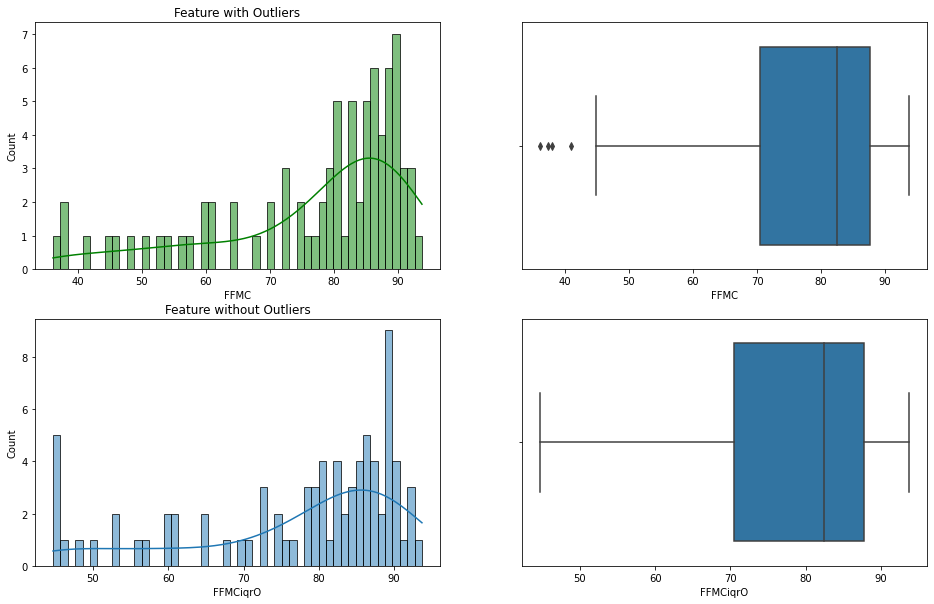

In [51]:
create_comparison_plot(data,col1="FFMC", col2="FFMCiqrO")

In [52]:
correlated_features

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [53]:
handle_extreme_outliers(data,'DMC')

percentile25 5.7
percentile75 19.0
Upper limit 58.900000000000006
Lower limit -34.2
Identified outliers: 0
Non-outlier observations: 81


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WsiqrO,RainextO,RainiqrO,FFMCiqrO,DMCextO


In [54]:
data.drop("DMCextO",axis=1,inplace=True)

In [55]:
handle_outliers_IQR(data,'DMC')

percentile25 5.7
percentile75 19.0
Upper limit 38.95
Lower limit -14.250000000000004
Identified outliers: 4
Non-outlier observations: 77


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WsiqrO,RainextO,RainiqrO,FFMCiqrO,DMCiqrO


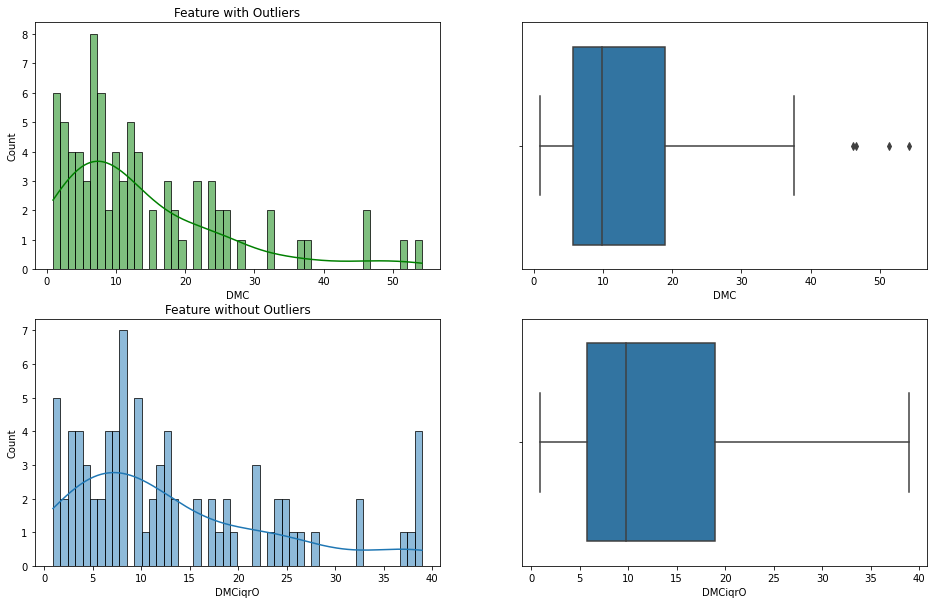

In [56]:
create_comparison_plot(data,col1="DMC", col2="DMCiqrO")

In [57]:
correlated_features

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [58]:
handle_extreme_outliers(data,'DC')

percentile25 10.0
percentile75 71.0
Upper limit 254.0
Lower limit -173.0
Identified outliers: 0
Non-outlier observations: 81


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WsiqrO,RainextO,RainiqrO,FFMCiqrO,DMCiqrO,DCextO


In [59]:
data.drop("DCextO",axis=1,inplace=True)

In [60]:
handle_outliers_IQR(data,'DC')

percentile25 10.0
percentile75 71.0
Upper limit 162.5
Lower limit -81.5
Identified outliers: 4
Non-outlier observations: 77


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WsiqrO,RainextO,RainiqrO,FFMCiqrO,DMCiqrO,DCiqrO


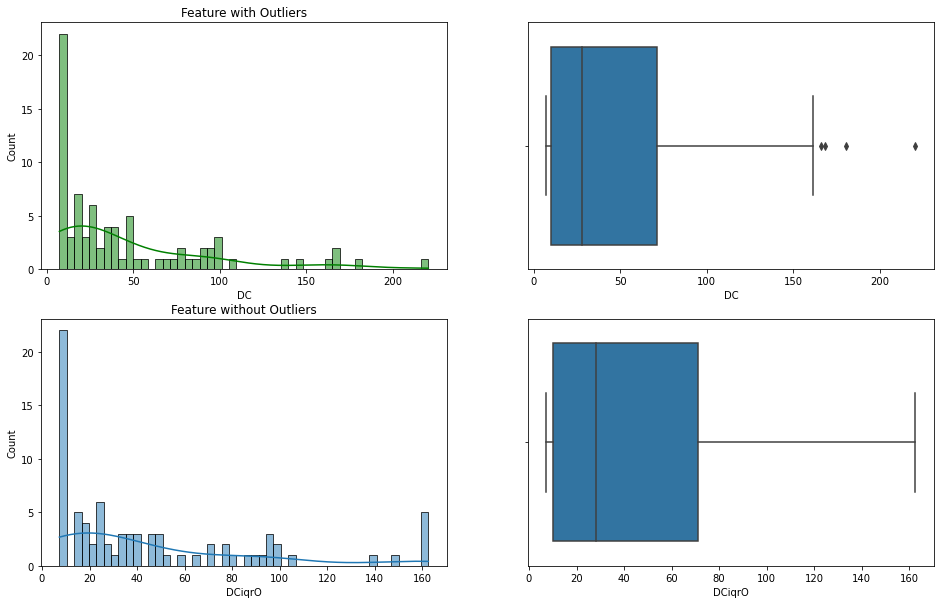

In [61]:
create_comparison_plot(data,col1="DC", col2="DCiqrO")

In [62]:
correlated_features

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [63]:
handle_extreme_outliers(data,'ISI')

percentile25 1.3
percentile75 6.8
Upper limit 23.3
Lower limit -15.2
Identified outliers: 0
Non-outlier observations: 81


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WsiqrO,RainextO,RainiqrO,FFMCiqrO,DMCiqrO,DCiqrO,ISIextO


In [64]:
data.drop("ISIextO", axis=1,inplace=True)

In [65]:
handle_outliers_IQR(data,'ISI')

percentile25 1.3
percentile75 6.8
Upper limit 15.05
Lower limit -6.95
Identified outliers: 1
Non-outlier observations: 80


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WsiqrO,RainextO,RainiqrO,FFMCiqrO,DMCiqrO,DCiqrO,ISIiqrO


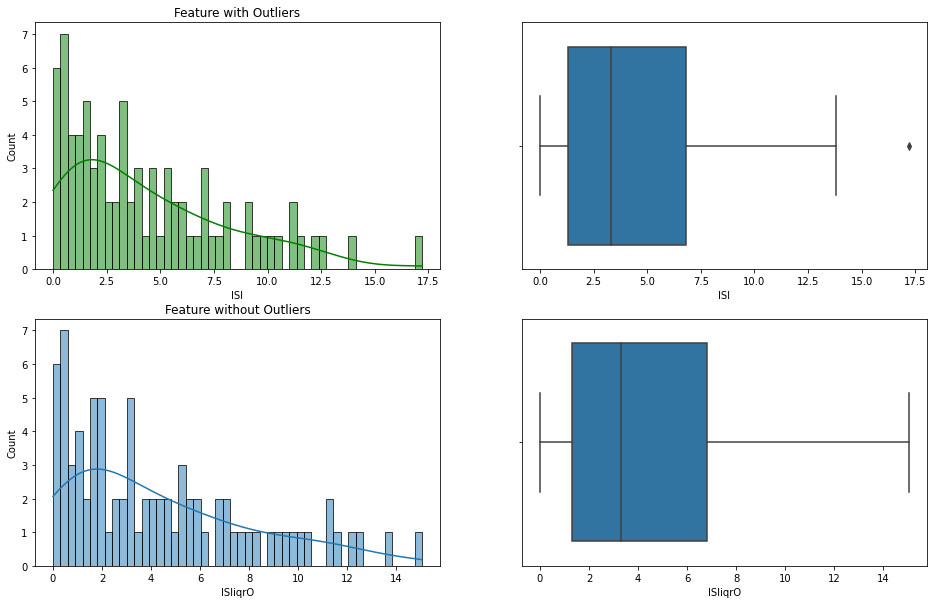

In [66]:
create_comparison_plot(data,col1="ISI", col2="ISIiqrO")

In [67]:
correlated_features

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [68]:
handle_extreme_outliers(data,'BUI')

percentile25 5.9
percentile75 23.8
Upper limit 77.5
Lower limit -47.8
Identified outliers: 0
Non-outlier observations: 81


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WsiqrO,RainextO,RainiqrO,FFMCiqrO,DMCiqrO,DCiqrO,ISIiqrO,BUIextO


In [69]:
data.drop("BUIextO", axis=1,inplace=True)

In [70]:
handle_outliers_IQR(data,'BUI')

percentile25 5.9
percentile75 23.8
Upper limit 50.65
Lower limit -20.949999999999996
Identified outliers: 2
Non-outlier observations: 79


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WsiqrO,RainextO,RainiqrO,FFMCiqrO,DMCiqrO,DCiqrO,ISIiqrO,BUIiqrO


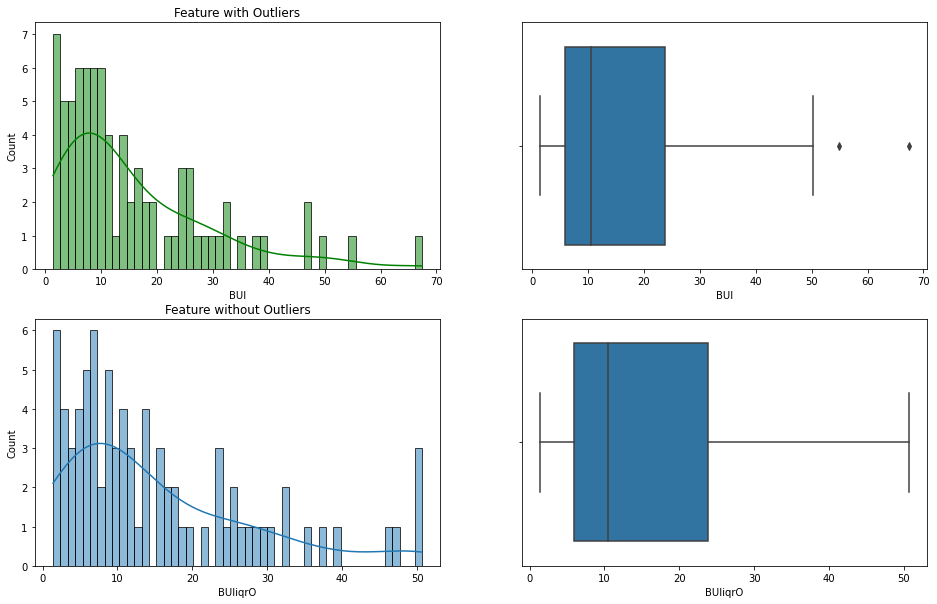

In [71]:
create_comparison_plot(data,col1="BUI", col2="BUIiqrO")

In [72]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WsiqrO,RainextO,RainiqrO,FFMCiqrO,DMCiqrO,DCiqrO,ISIiqrO,BUIiqrO
0,19,9,2012,29,57,14,0.0,89.3,12.5,41.3,7.8,14.2,9.7,fire,0.0,14.0,0.0,0.0,89.3,12.5,41.3,7.8,14.2
1,29,6,2012,37,36,13,0.6,86.2,17.9,36.7,4.8,17.8,7.2,fire,1.0,13.0,0.6,0.6,86.2,17.9,36.7,4.8,17.8
2,8,7,2012,33,68,19,0.0,85.6,12.5,49.8,6.0,15.4,8.0,fire,0.0,19.0,0.0,0.0,85.6,12.5,49.8,6.0,15.4
3,15,8,2012,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,fire,0.0,13.0,0.3,0.3,82.4,15.6,92.5,3.7,22.0
4,18,9,2012,32,49,11,0.0,89.4,9.8,33.1,6.8,11.3,7.7,fire,0.0,11.0,0.0,0.0,89.4,9.8,33.1,6.8,11.3


In [73]:
correlated_features

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [74]:
handle_extreme_outliers(data,'FWI')

percentile25 0.8
percentile75 9.9
Upper limit 37.199999999999996
Lower limit -26.499999999999996
Identified outliers: 0
Non-outlier observations: 81


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WsiqrO,RainextO,RainiqrO,FFMCiqrO,DMCiqrO,DCiqrO,ISIiqrO,BUIiqrO,FWIextO


In [75]:
data.drop("FWIextO",axis=1,inplace=True)

In [76]:
handle_outliers_IQR(data,'FWI')

percentile25 0.8
percentile75 9.9
Upper limit 23.549999999999997
Lower limit -12.849999999999998
Identified outliers: 3
Non-outlier observations: 78


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WsiqrO,RainextO,RainiqrO,FFMCiqrO,DMCiqrO,DCiqrO,ISIiqrO,BUIiqrO,FWIiqrO


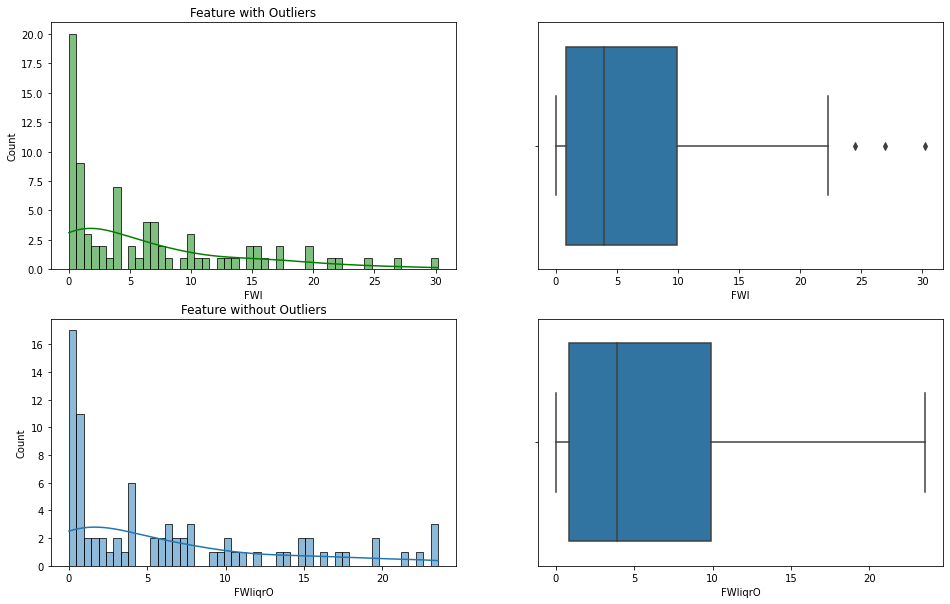

In [77]:
create_comparison_plot(data,col1="FWI", col2="FWIiqrO")

# HAndling CAtegorical Feature

In [78]:
categorical_features

['Classes']

In [79]:
data['Classes'].unique()

array(['fire', 'notfire'], dtype=object)

In [80]:
## One Hot Encoding

def nominal_one_hot_encoding(df, variable):
    '''
    Performs One Hot Encoding
    '''
    df_dumm = pd.get_dummies(df[variable],drop_first=True,prefix=variable)
    df = pd.concat([df,df_dumm],axis=1)
    df.drop(axis=1,columns=[variable],inplace=True)
    return df

In [81]:
data = nominal_one_hot_encoding(df = data,variable = 'Classes')
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,WsiqrO,RainextO,RainiqrO,FFMCiqrO,DMCiqrO,DCiqrO,ISIiqrO,BUIiqrO,FWIiqrO,Classes_notfire
0,19,9,2012,29,57,14,0.0,89.3,12.5,41.3,7.8,14.2,9.7,0.0,14.0,0.0,0.0,89.3,12.5,41.3,7.8,14.2,9.7,0
1,29,6,2012,37,36,13,0.6,86.2,17.9,36.7,4.8,17.8,7.2,1.0,13.0,0.6,0.6,86.2,17.9,36.7,4.8,17.8,7.2,0
2,8,7,2012,33,68,19,0.0,85.6,12.5,49.8,6.0,15.4,8.0,0.0,19.0,0.0,0.0,85.6,12.5,49.8,6.0,15.4,8.0,0
3,15,8,2012,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0,13.0,0.3,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0
4,18,9,2012,32,49,11,0.0,89.4,9.8,33.1,6.8,11.3,7.7,0.0,11.0,0.0,0.0,89.4,9.8,33.1,6.8,11.3,7.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,6,8,2012,32,75,14,0.0,86.4,13.0,39.1,5.2,14.2,6.8,0.0,14.0,0.0,0.0,86.4,13.0,39.1,5.2,14.2,6.8,0
77,27,6,2012,34,53,18,0.0,89.0,21.6,80.3,9.2,25.8,15.0,0.0,18.0,0.0,0.0,89.0,21.6,80.3,9.2,25.8,15.0,0
78,6,9,2012,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0.9,0.0,19.0,0.1,0.1,75.8,3.6,32.2,2.1,5.6,0.9,1
79,1,9,2012,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1,0.0,17.0,2.4,1.5,46.0,1.3,7.5,0.2,1.8,0.1,1


In [82]:
# Saving dataset after handling outliers data
data.to_csv('prepared_data_test.csv',index=False)